In [ ]:
help("modules") #list of my installed libraries

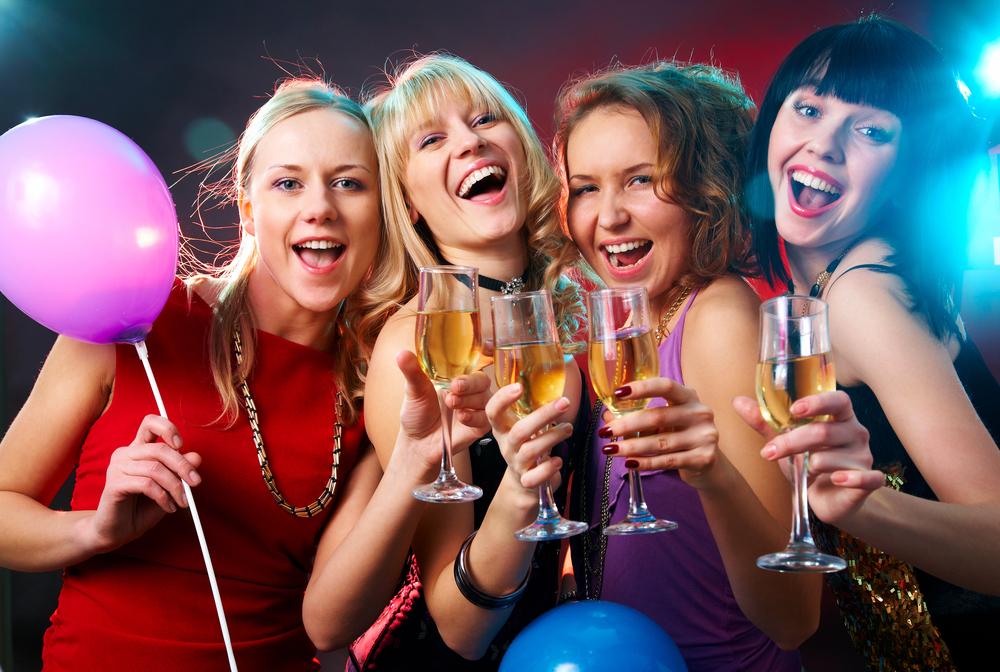

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2
test_image = 'holiday-party-networking-tips.jpg'
img = io.imread(test_image)
from IPython.display import Image
from IPython.display import display
display(Image(filename='holiday-party-networking-tips.jpg', width=400))

img = cv2.imread('holiday-party-networking-tips.jpg') 
# img = cv2.imread('../utils/thom_hi.jpg')
test_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #RGB
detected_image = test_image.copy()

# dlib library example

number of faces: 4
253 153 382 282
554 153 683 282
752 81 906 236
411 96 540 225


/home/dval/.anaconda3/envs/assembly/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


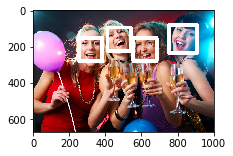

In [2]:
# dlib
# pip install dlib
# example at http://dlib.net/face_detector.py.html
import dlib

#uses this model as far i can tell http://dlib.net/python/index.html#dlib.face_recognition_model_v1
dlib_face_detector = dlib.get_frontal_face_detector() 
# The 1 in the second argument indicates that we should upsample the image
# 1 time.  This will make everything bigger and allow us to detect more
# faces.
dets = dlib_face_detector(img, 1)
print('number of faces:', len(dets))
# print('bounding boxes:', dets)

for i, d in enumerate(dets):
    print( d.left(), d.top(), d.right(), d.bottom() )

    cv2.rectangle(detected_image, (d.left(), d.top()), (d.right(), d.bottom()), (255,255,255), 20)

    plt.subplot(1,2,2)
    plt.imshow(detected_image)

    plt.tight_layout()
    

# haarcascades

number of faces: 6


/home/dval/.anaconda3/envs/assembly/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


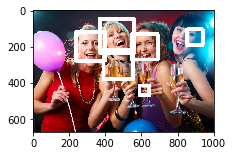

In [2]:
# from Thom's haar_cascades_blur.ipynb
plt.clf()
plt.cla()

face_cascade_name = '../utils/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier()
face_cascade.load(face_cascade_name)
haarcascades_faces = face_cascade.detectMultiScale(test_image, 1.1, 2, 0|cv2.CASCADE_SCALE_IMAGE, (30, 30))
# print(haarcascades_faces)
print('number of faces:', haarcascades_faces.shape[0])

for i in range(haarcascades_faces.shape[0]):
    x,y,w,h  = haarcascades_faces[i]
    # Draw bounding box
    cv2.rectangle(detected_image, (x,y), (x+w,y+h), (255,255,255), 20)

    plt.subplot(1,2,2)
    plt.imshow(detected_image)

    plt.tight_layout()

# openface library example

## you gotta install torch to use this http://torch.ch/docs/getting-started.html

## and this stuff https://github.com/cmusatyalab/openface/blob/master/docs/setup.md

In [3]:
import openface
# pre-trained models explanations: https://cmusatyalab.github.io/openface/models-and-accuracies/

import openface

align = openface.AlignDlib('openface_models/shape_predictor_68_face_landmarks.dat')
net = openface.TorchNeuralNet('openface_models/nn4.small2.v1.t7')

# # `img` is a numpy matrix containing the RGB pixels of the image.
bb = align.getLargestFaceBoundingBox(img)
alignedFace = align.align(96, img, bb,
                          landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
rep1 = net.forward(alignedFace)

# # `rep2` obtained similarly.
# d = rep1 - rep2
# distance = np.dot(d, d)
# print(rep1, type(rep1))


[ 0.10841787 -0.01306479  0.03610702 -0.05403752 -0.07119723  0.03900683
 -0.03628594  0.13529183 -0.05712934 -0.03793047  0.11651108 -0.00108935
  0.15057984  0.03621715 -0.00283791  0.07424318  0.02800033 -0.06894644
 -0.17985897  0.11784198  0.13221486 -0.03395918  0.04215826  0.09944415
 -0.03880286  0.02278528  0.07908734  0.00171088  0.00078719  0.00675597
 -0.05752126  0.04037958  0.07833789  0.18972902 -0.17011937 -0.01833649
 -0.03492811  0.19642548 -0.07326014 -0.01128227 -0.09226594 -0.10943624
  0.0226928   0.016703    0.05040604 -0.10363587  0.02573491 -0.02299572
 -0.15823705  0.10998551  0.06936791 -0.05985569 -0.0853243   0.08358746
  0.07234036 -0.00139946 -0.09196518  0.03263654  0.03363019 -0.13885528
 -0.06955392 -0.08341631  0.0375655  -0.01276983 -0.06094338  0.09603588
 -0.05121076  0.09204607 -0.09058553 -0.02526906 -0.06428665 -0.11281613
 -0.07457715 -0.03279842  0.09332044 -0.05279487  0.10612283 -0.04855534
  0.01971399  0.11484682  0.01529825 -0.15778345  0

## need more work done to understand how openface works.. 
## good writeup here: https://medium.com/@ageitgey/machine-learning-is-fun-part-4-modern-face-recognition-with-deep-learning-c3cffc121d78